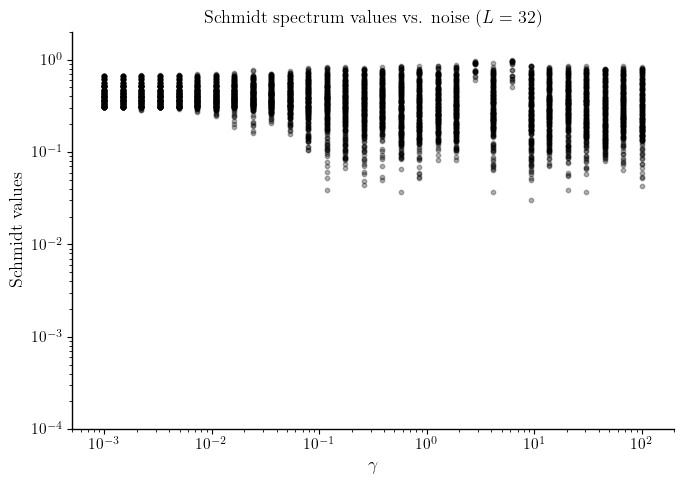

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import pickle

# ----- Global plot style -----
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": 13,
    "font.size": 12,
    "axes.titlesize": 13,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "xtick.direction": "out",
    "ytick.direction": "out",
    "axes.linewidth": 1.0,
    "legend.fontsize": 11,
    "figure.figsize": (7, 5)
})

L = 32  # Choose one system size
gammas = np.logspace(-3, 2, 30)

filename = f"schmidt_{L}.pickle"

with open(filename, 'rb') as f:
    data = pickle.load(f)

# ----- Plot -----
fig, ax = plt.subplots()

for gamma_val, gamma_data in zip(gammas, data):
    for observable in gamma_data:
        if observable.gate.name == "schmidt_spectrum":
            schmidt_values = observable.results  # should already be flattened 1D array#
            # Convert each trajectory to array, then flatten all at once
            all_values = [np.asarray(trajectory).ravel() for trajectory in schmidt_values]
            schmidt_values = np.concatenate(all_values)
            x = np.full_like(schmidt_values, gamma_val)
            ax.scatter(x, np.sqrt(schmidt_values), s=10, alpha=0.3, color='black')  # you can use cmap if desired
            break  # assume only one schmidt observable per gamma

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(5e-4, 2e2)
ax.set_ylim(1e-2, 2)
ax.set_xlabel(r'$\gamma$')
ax.set_ylabel('Schmidt values')
ax.set_title(f'Schmidt spectrum values vs. noise ($L={L}$)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig("schmidt_values_vs_gamma.pdf", dpi=300)
plt.show()